# Understanding MC Dropout for Regression

In [ ]:
import numpy as np
import pandas as pd

import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout, Conv2D
from tensorflow.keras.models import load_model

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

### Heteroskedastic Data

In [2]:
np.random.seed(42)
x = np.linspace(-0.5, 1, 100)
y = 5*x + 4 + 2*np.multiply(x, np.random.randn(100))

Text(0, 0.5, 'y')

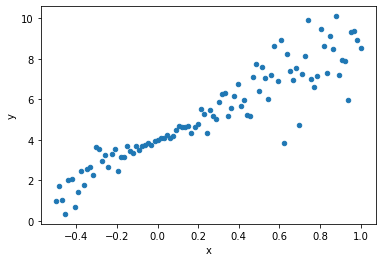

In [3]:
plt.scatter(x, y,s=20)
plt.xlabel("x")
plt.ylabel("y")

In [4]:
class MonteCarloDropout(Dropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

### Model 1

In [5]:
model = Sequential()
model.add(Dense(input_shape=(1,), units=1))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(loss='mse', optimizer='adam')
model.fit(x, y, epochs=4000, verbose=0)

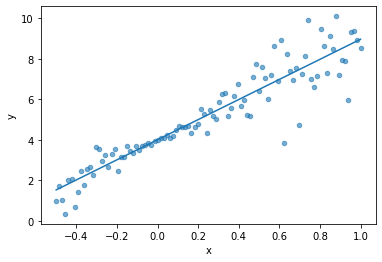

In [8]:
plt.scatter(x, y, s=20, alpha=0.6)
plt.xlabel("x")
plt.ylabel("y")
pred_m1 = model.predict(x)
plt.plot(x, pred_m1)

#### Model 2

In [9]:
model2 = Sequential()
model2.add(Dense(input_shape=(1,), units=1))
model2.add(MonteCarloDropout(rate=0.25))


In [10]:
model2.compile(loss='mse', optimizer='adam')
model2.fit(x, y, epochs=4000, verbose=0)


In [11]:
T=100 #(NUMBER OF PREDICTIONS)
predictions=[model2.predict(x) for _ in range(T)]
predictions=np.stack(predictions)
mean=predictions.mean(axis=0)[:,0]
std=predictions.std(axis=0)[:,0]


In [12]:
def plot(x,y,mean,std):
    plt.scatter(x, y, s=20, alpha=0.6)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.plot(x, mean , color='k')
    plt.fill_between(x, mean-std, mean+std, color='k', alpha=0.4)

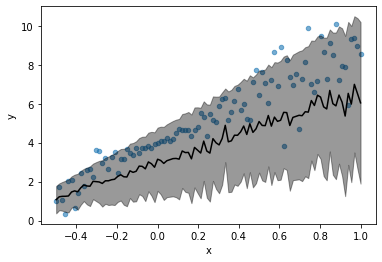

In [13]:
plot(x,y,mean,std)

#### Model 3

In [14]:
model3 = Sequential()
model3.add(Dense(input_shape=(1,), units=300))
model3.add(MonteCarloDropout(rate=0.25))
model3.add(Dense(units=120))
model3.add(MonteCarloDropout(rate=0.25))
model3.add(Dense(units=10))
model3.add(MonteCarloDropout(rate=0.25))
model3.add(Dense(units=1))

In [15]:
model3.compile(loss='mse', optimizer='adam')
model3.fit(x, y, epochs=4000, verbose=0)

In [16]:
T=100 #(NUMBER OF PREDICTIONS)
predictions=[model3.predict(x) for _ in range(T)]
predictions=np.stack(predictions)
mean=predictions.mean(axis=0)[:,0]
std=predictions.std(axis=0)[:,0]

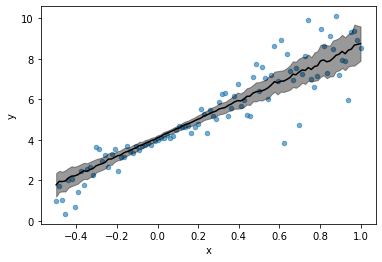

In [17]:
plot(x,y,mean,std)

In [18]:
#### Model4

In [19]:
model4 = Sequential()
model4.add(Dense(input_shape=(1,), units=2, activation='relu'))
model4.add(MonteCarloDropout(rate=0.25))
model4.add(Dense(units=2, activation='relu'))
model4.add(MonteCarloDropout(rate=0.25))
model4.add(Dense(units=2))
model4.add(MonteCarloDropout(rate=0.25))
model4.add(Dense(units=1))

In [20]:
model4.compile(loss='mse', optimizer='adam')
model4.fit(x, y, epochs=4000, verbose=0)

In [21]:
T=100 #(NUMBER OF PREDICTIONS)
predictions=[model4.predict(x) for _ in range(T)]
predictions=np.stack(predictions)
mean=predictions.mean(axis=0)[:,0]
std=predictions.std(axis=0)[:,0]

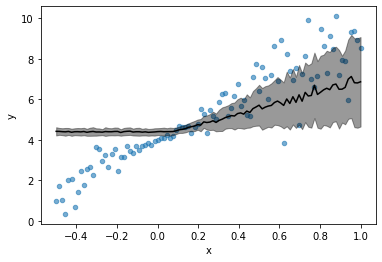

In [22]:
plot(x,y,mean,std)

In [23]:
#### Model 5

In [24]:
model5 = Sequential()
model5.add(Dense(input_shape=(1,), units=300, activation='relu'))
model5.add(MonteCarloDropout(rate=0.25))
model5.add(Dense(units=120, activation='relu'))
model5.add(MonteCarloDropout(rate=0.25))
model5.add(Dense(units=10))
model5.add(MonteCarloDropout(rate=0.25))
model5.add(Dense(units=1))

In [25]:
model5.compile(loss='mse', optimizer='adam')
model5.fit(x, y, epochs=4000, verbose=0)
model5.save(".\MC_dropout\Regression\models\model5.h5")

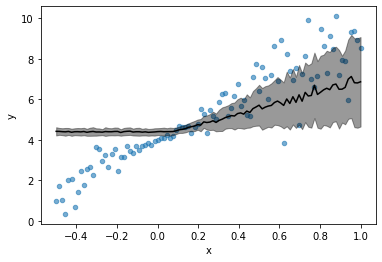

In [26]:
plot(x,y,mean,std)

In [27]:
#### Model 6

In [28]:
model6 = Sequential()
model6.add(Dense(input_shape=(1,), units=300, activation='tanh'))
model6.add(MonteCarloDropout(rate=0.25))
model6.add(Dense(units=240, activation='tanh'))
model6.add(MonteCarloDropout(rate=0.25))
model6.add(Dense(units=120))
model6.add(MonteCarloDropout(rate=0.25))
model6.add(Dense(units=60))
model6.add(MonteCarloDropout(rate=0.25))
model6.add(Dense(units=30))
model6.add(MonteCarloDropout(rate=0.25))
model6.add(Dense(units=10))
model6.add(MonteCarloDropout(rate=0.25))
model6.add(Dense(units=1))

In [29]:
model6.compile(loss='mse', optimizer='adam')
model6.fit(x, y, epochs=4000, verbose=0)

In [30]:
T=100 #(NUMBER OF PREDICTIONS)
predictions=[model6.predict(x) for _ in range(T)]
predictions=np.stack(predictions)
mean=predictions.mean(axis=0)[:,0]
std=predictions.std(axis=0)[:,0]

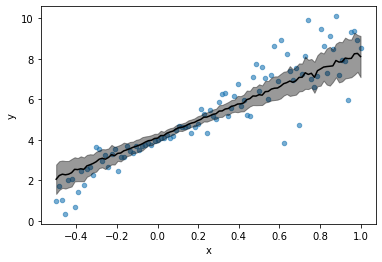

In [31]:
plot(x,y,mean,std)

In [32]:
### Analysing the best model among the above ones


In [33]:
predictions=[]
mean=[]
std=[]
num_iteration=101
for i in range(1,num_iteration):
    print(i)
    T=i #(NUMBER OF PREDICTIONS)
    predictions=([model5.predict(x) for _ in range(T)])
    predictions=np.stack(predictions)
    mean.append(predictions.mean(axis=0)[:,0])
    std.append(predictions.std(axis=0)[:,0])

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


In [34]:
def update(iteration):
    ax.cla()
    ax.scatter(x, y, s=20, alpha=0.6)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.plot(x, mean[iteration] , color='k')
    ax.fill_between(x, mean[iteration]-std[iteration], mean[iteration]+std[iteration], color='k', alpha=0.4)
    fig.tight_layout()

In [35]:
from matplotlib.animation import FuncAnimation
from matplotlib import rc
fig, ax = plt.subplots()
anim = FuncAnimation(fig, update, frames=np.arange(0,num_iteration-1 , 1), interval=250)
plt.close()
rc('animation', html='jshtml')

In [36]:
anim

In [37]:
np.random.seed(42)
x_test = np.linspace(1, 1.5, 30)
y_test = 5*x_test + 4 + 2*np.multiply(x_test, np.random.randn(30))

In [38]:
mean_test=[]
std_test=[]
num_iteration=101
for i in range(1,num_iteration):
    print(i)
    T=i #(NUMBER OF PREDICTIONS)
    predictions=([model5.predict(x_test) for _ in range(T)])
    predictions=np.stack(predictions)
    mean_test.append(predictions.mean(axis=0)[:,0])
    std_test.append(predictions.std(axis=0)[:,0])

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


In [39]:
def update_test(iteration):
    ax.cla()
    ax.scatter(x_test, y_test, s=20, alpha=0.6)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.plot(x_test, mean_test[iteration] , color='k')
    ax.fill_between(x_test, mean_test[iteration]-std_test[iteration], mean_test[iteration]+std_test[iteration], color='k', alpha=0.4)
    fig.tight_layout()

In [40]:
from matplotlib.animation import FuncAnimation
from matplotlib import rc
fig, ax = plt.subplots()
anim = FuncAnimation(fig, update_test, frames=np.arange(0,num_iteration-1 , 1), interval=250)
plt.close()
rc('animation', html='jshtml')

In [41]:
anim